In [1]:
import sys
sys.path.append('/kaggle/input/qwertttt')

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import torch

import transformers
from transformers import BertTokenizer
from typing import *

from MEOW_Models.MT_models import MEOW_MTM
from MEOW_Models.Kernel_model import BertWithoutEmbedding

from MEOW_Utils.Data_utils import* 
from MEOW_Utils.Training_utils import*

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
BATCH_SIZE = 16
EPOCH_NUM = 10

# INPUT_FILE_PATH_SQuAD = r'C:\Users\Administrator\codeblocks_workspace\MEOW\Data_file\SQuAD.csv'
# INPUT_FILE_PATH_CoLA = r'C:\Users\Administrator\codeblocks_workspace\MEOW\Data_file\CoLA_train.csv'
# INPUT_FILE_PATH_MNLI = r'C:\Users\Administrator\codeblocks_workspace\MEOW\Data_file\MNLI_train.csv'
# INPUT_FILE_PATH_RTE = r'C:\Users\Administrator\codeblocks_workspace\MEOW\Data_file\RTE_train.csv'
# INPUT_FILE_PATH_Sentiment = r'C:\Users\Administrator\codeblocks_workspace\MEOW\Data_file\Sentiment_train.csv'

INPUT_FILE_PATH_CoLA = r'/kaggle/input/qwertttt/Data_file/CoLA_train.csv'
INPUT_FILE_PATH_Sentiment = r'/kaggle/input/qwertttt/Data_file/Sentiment_train.csv'
INPUT_FILE_PATH_MNLI = r'/kaggle/input/qwertttt/Data_file/MNLI_train.csv'
INPUT_FILE_PATH_RTE = r'/kaggle/input/qwertttt/Data_file/RTE_train.csv'
INPUT_FILE_PATH_SQuAD = r'/kaggle/input/qwertttt/Data_file/SQuAD.csv'

SQuAD_DATASIZE = 1000
CoLA_DATASIZE = 600
Sentiment_DATASIZE = 600
MNLI_DATASIZE = 600
RTE_DATASIZE = 600

TEST_SIZE = 0.3

CoLA_num_labels = 2
Sentiment_num_labels = 5
MNLI_num_labels = 3
RTE_num_labels = 2

# SQuAD_DATASIZE max value is 5000
# CoLA_DATASIZE max value is 5056
# Sentiment_DATASIZE max value is 27405
# MNLI_DATASIZE max value is 13191
# RTE_DATASIZE max value is 2482

PRETRAINED_MODULE_NAME = 'bert-base-uncased'

In [2]:
#處理好 dataframe
tokenizer = BertTokenizer.from_pretrained(PRETRAINED_MODULE_NAME)

df_CoLA = get_dataframe(INPUT_FILE_PATH_CoLA, 'CoLA', tokenizer, CoLA_DATASIZE)

df_Sentiment = get_dataframe(INPUT_FILE_PATH_Sentiment, 'Sentiment', tokenizer, Sentiment_DATASIZE)

df_MNLI = get_dataframe(INPUT_FILE_PATH_MNLI, 'MNLI', tokenizer, MNLI_DATASIZE)

df_RTE = get_dataframe(INPUT_FILE_PATH_RTE, 'RTE', tokenizer, RTE_DATASIZE)

df_SQuAD = get_dataframe(INPUT_FILE_PATH_SQuAD, 'SQuAD', tokenizer, SQuAD_DATASIZE)

/kaggle/input/qwertttt/MEOW_Utils/Data_utils.py:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['TKstart'][i], df_train['TKend'][i] = count_the_TKbeg_and_TKend(df_train.iloc[i]['context'], df_train.iloc[i]['answer_start'], df_train.iloc[i]['text'], tokenizer)


In [3]:
bert_kernel_model = BertWithoutEmbedding.from_pretrained(PRETRAINED_MODULE_NAME)

CoLA_databox = DataBox(
               bert_kernel_model = bert_kernel_model,
               df_Data = df_CoLA,
               test_size = TEST_SIZE,
               tokenizer = tokenizer,
               label_nums = CoLA_num_labels,
               batch_size = BATCH_SIZE,
               dataset_name = 'CoLA'
               )

Sentiment_databox = DataBox(
               bert_kernel_model = bert_kernel_model,
               df_Data = df_Sentiment,
               test_size = TEST_SIZE,
               tokenizer = tokenizer,
               label_nums = Sentiment_num_labels,
               batch_size = BATCH_SIZE,
               dataset_name = 'Sentiment'
               )

MNLI_databox = DataBox(
               bert_kernel_model = bert_kernel_model,
               df_Data = df_MNLI,
               test_size = TEST_SIZE,
               tokenizer = tokenizer,
               label_nums = MNLI_num_labels,
               batch_size = BATCH_SIZE,
               dataset_name = 'MNLI'
               )

RTE_databox = DataBox(
               bert_kernel_model = bert_kernel_model,
               df_Data = df_RTE,
               test_size = TEST_SIZE,
               tokenizer = tokenizer,
               label_nums = RTE_num_labels,
               batch_size = BATCH_SIZE,
               dataset_name = 'RTE'
               )

SQuAD_databox = DataBox(
               bert_kernel_model = bert_kernel_model,
               df_Data = df_SQuAD,
               test_size = TEST_SIZE,
               tokenizer = tokenizer,
               label_nums = 0,
               batch_size = BATCH_SIZE,
               dataset_name = 'SQuAD'
               )

# check if the dataloader can run correctly 
for i in CoLA_databox.test_dataloader:
    0
for i in Sentiment_databox.test_dataloader:
    0
for i in MNLI_databox.test_dataloader:
    0
for i in RTE_databox.test_dataloader:
    0
for i in SQuAD_databox.test_dataloader:
    0

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertWithoutEmbedding: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertWithoutEmbedding from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertWithoutEmbedding from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [4]:
MEOW_model = MEOW_MTM(bert_kernel_model, 
                    CoLA_databox.embedding_layer, CoLA_databox.label_nums,
                    Sentiment_databox.embedding_layer, Sentiment_databox.label_nums, 
                    MNLI_databox.embedding_layer, MNLI_databox.label_nums, 
                    RTE_databox.embedding_layer, RTE_databox.label_nums,
                    SQuAD_databox.embedding_layer,
                    DEVICE)

# H = {
#     "train_loss": [],
#     "train_acc": [],
#     "val_loss":[],
#     "val_acc": []
#     }

Training_a_epoc_data_num = min([len(CoLA_databox.training_dataset),
                       len(Sentiment_databox.training_dataset), 
                       len(MNLI_databox.training_dataset), 
                       len(RTE_databox.training_dataset), 
                       len(SQuAD_databox.training_dataset)])

Training_round = int(Training_a_epoc_data_num / BATCH_SIZE)

Test_a_epoc_data_num = min([len(CoLA_databox.test_dataset), 
                       len(Sentiment_databox.test_dataset), 
                       len(MNLI_databox.test_dataset), 
                       len(RTE_databox.test_dataset), 
                       len(SQuAD_databox.test_dataset)])

Test_round = int(Test_a_epoc_data_num / BATCH_SIZE)

print(f'Per epoc round\'s num is {Training_round}')

Per epoc round's num is 17


In [5]:
# 訓練

for epoch in range(EPOCH_NUM):
    print("the {:d} iter :".format(epoch+1))

    #### training now
    MEOW_model.train()

    CoLA_training_loss = 0.0
    Sentiment_training_loss = 0.0
    MNLI_training_loss = 0.0
    RTE_training_loss = 0.0
    SQuAD_training_loss = 0.0

    CoLA_training_correct = 0.0
    Sentiment_training_correct = 0.0
    MNLI_training_correct = 0.0
    RTE_training_correct = 0.0

    CoLA_iter = iter(CoLA_databox.training_dataloader)
    Sentiment_iter = iter(Sentiment_databox.training_dataloader)
    MNLI_iter = iter(MNLI_databox.training_dataloader)
    RTE_iter = iter(RTE_databox.training_dataloader)
    SQuAD_iter = iter(SQuAD_databox.training_dataloader)

    # training_correct = 0.0

    for i in range(Training_round):
        
        # CoLA first
        loss, prob, correct_num = Training(MEOW_model, CoLA_iter, DEVICE, dataset_name='CoLA', do_optimize=True)
        #print("the CoLA loss is : ", loss.item())
        CoLA_training_loss += loss.item()
        CoLA_training_correct += correct_num

        # Sentiment
        loss, prob, correct_num = Training(MEOW_model, Sentiment_iter, DEVICE, dataset_name='Sentiment', do_optimize=True)
        #print("the Sentiment loss is : ", loss.item())
        Sentiment_training_loss += loss.item()
        Sentiment_training_correct += correct_num

        # MNLI
        loss, prob, correct_num = Training(MEOW_model, MNLI_iter, DEVICE, dataset_name='MNLI', do_optimize=True)
        #print("the Sentiment loss is : ", loss.item())
        MNLI_training_loss += loss.item()
        MNLI_training_correct += correct_num

        # RTE
        loss, prob, correct_num = Training(MEOW_model, RTE_iter, DEVICE, dataset_name='RTE', do_optimize=True)
        #print("the Sentiment loss is : ", loss.item())
        RTE_training_loss += loss.item()
        RTE_training_correct += correct_num

        # SQuAD
        loss = Training(MEOW_model, SQuAD_iter, DEVICE, dataset_name='SQuAD', do_optimize=False)
        # print("the SQuAD loss is : ", loss.item())
        SQuAD_training_loss += loss.item()

    
    CoLA_avg_loss = CoLA_training_loss / Training_round
    Sentiment_avg_loss = Sentiment_training_loss / Training_round
    MNLI_avg_loss = MNLI_training_loss / Training_round
    RTE_avg_loss = RTE_training_loss / Training_round
    SQuAD_avg_loss = SQuAD_training_loss / Training_round
    
    CoLA_accuracy = CoLA_training_correct / Training_a_epoc_data_num
    Sentiment_accuracy = Sentiment_training_correct / Training_a_epoc_data_num
    MNLI_accuracy = MNLI_training_correct / Training_a_epoc_data_num
    RTE_accuracy = RTE_training_correct / Training_a_epoc_data_num
    
    CoLA_databox.H['train_loss'].append(CoLA_training_loss / Training_round)
    Sentiment_databox.H['train_loss'].append(Sentiment_training_loss / Training_round)
    MNLI_databox.H['train_loss'].append(MNLI_training_loss / Training_round)
    RTE_databox.H['train_loss'].append(RTE_training_loss / Training_round)
    SQuAD_databox.H['train_loss'].append(SQuAD_training_loss / Training_round)
    
    CoLA_databox.H['train_acc'].append(CoLA_accuracy)
    Sentiment_databox.H['train_acc'].append(Sentiment_accuracy)
    MNLI_databox.H['train_acc'].append(MNLI_accuracy)
    RTE_databox.H['train_acc'].append(RTE_accuracy)

    print("CoLA train loss: {:.6f}, CoLA accuracy: {:.4f}".format(CoLA_avg_loss, CoLA_accuracy))
    print("Sentiment train loss: {:.6f}, Sentiment accuracy: {:.4f}".format(Sentiment_avg_loss, Sentiment_accuracy))
    print("MNLI train loss: {:.6f}, MNLI accuracy: {:.4f}".format(MNLI_avg_loss, MNLI_accuracy))
    print("RTE train loss: {:.6f}, RTE accuracy: {:.4f}".format(RTE_avg_loss, RTE_accuracy))
    print("SQuAD train loss: {:.6f}".format(SQuAD_avg_loss))
    print('')

    #### test now
    MEOW_model.eval()

    CoLA_test_loss = 0.0
    Sentiment_test_loss = 0.0
    MNLI_test_loss = 0.0
    RTE_test_loss = 0.0
    SQuAD_test_loss = 0.0

    CoLA_test_correct = 0.0
    Sentiment_test_correct = 0.0
    MNLI_test_correct = 0.0
    RTE_test_correct = 0.0

    CoLA_iter = iter(CoLA_databox.test_dataloader)
    Sentiment_iter = iter(Sentiment_databox.test_dataloader)
    MNLI_iter = iter(MNLI_databox.test_dataloader)
    RTE_iter = iter(RTE_databox.test_dataloader)
    SQuAD_iter = iter(SQuAD_databox.test_dataloader)

    for i in range(Test_round):
        
        # CoLA first
        loss, prob, correct_num = Training(MEOW_model, CoLA_iter, DEVICE, dataset_name='CoLA', do_optimize=False)
        #print("the CoLA loss is : ", loss.item())
        CoLA_test_loss += loss.item()
        CoLA_test_correct += correct_num.item()

        # Sentiment
        loss, prob, correct_num = Training(MEOW_model, Sentiment_iter, DEVICE, dataset_name='Sentiment', do_optimize=False)
        #print("the Sentiment loss is : ", loss.item())
        Sentiment_test_loss += loss.item()
        Sentiment_test_correct += correct_num.item()

        # MNLI
        loss, prob, correct_num = Training(MEOW_model, MNLI_iter, DEVICE, dataset_name='MNLI', do_optimize=False)
        #print("the Sentiment loss is : ", loss.item())
        MNLI_test_loss += loss.item()
        MNLI_test_correct += correct_num.item()

        # RTE
        loss, prob, correct_num = Training(MEOW_model, RTE_iter, DEVICE, dataset_name='RTE', do_optimize=False)
        #print("the Sentiment loss is : ", loss.item())
        RTE_test_loss += loss.item()
        RTE_test_correct += correct_num.item()

        # SQuAD
        loss = Training(MEOW_model, SQuAD_iter, DEVICE, dataset_name='SQuAD', do_optimize=False)
        # print("the SQuAD loss is : ", loss.item())
        SQuAD_test_loss += loss.item()


    CoLA_avg_loss = CoLA_test_loss / Test_round
    Sentiment_avg_loss = Sentiment_test_loss / Test_round
    MNLI_avg_loss = MNLI_test_loss / Test_round
    RTE_avg_loss = RTE_test_loss / Test_round
    SQuAD_avg_loss = SQuAD_test_loss / Test_round
    
    CoLA_accuracy = CoLA_test_correct / Test_a_epoc_data_num
    Sentiment_accuracy = Sentiment_test_correct / Test_a_epoc_data_num
    MNLI_accuracy = MNLI_test_correct / Test_a_epoc_data_num
    RTE_accuracy = RTE_test_correct / Test_a_epoc_data_num
    
    CoLA_databox.H['test_loss'].append(CoLA_test_loss / Test_round)
    Sentiment_databox.H['test_loss'].append(Sentiment_test_loss / Test_round)
    MNLI_databox.H['test_loss'].append(MNLI_test_loss / Test_round)
    RTE_databox.H['test_loss'].append(RTE_test_loss / Test_round)
    SQuAD_databox.H['test_loss'].append(SQuAD_test_loss / Test_round)
    
    CoLA_databox.H['test_acc'].append(CoLA_accuracy)
    Sentiment_databox.H['test_acc'].append(Sentiment_accuracy)
    MNLI_databox.H['test_acc'].append(MNLI_accuracy)
    RTE_databox.H['test_acc'].append(RTE_accuracy)

    print("CoLA test loss: {:.6f}, CoLA accuracy: {:.4f}".format(CoLA_avg_loss, CoLA_accuracy))
    print("Sentiment test loss: {:.6f}, Sentiment accuracy: {:.4f}".format(Sentiment_avg_loss, Sentiment_accuracy))
    print("MNLI test loss: {:.6f}, MNLI accuracy: {:.4f}".format(MNLI_avg_loss, MNLI_accuracy))
    print("RTE test loss: {:.6f}, RTE accuracy: {:.4f}".format(RTE_avg_loss, RTE_accuracy))
    print("SQuAD test loss: {:.6f}".format(SQuAD_avg_loss))
    print('')

the 1 iter :
CoLA train loss: 0.685320, CoLA accuracy: 0.5199
Sentiment train loss: 1.637892, Sentiment accuracy: 0.1769
MNLI train loss: 1.126722, MNLI accuracy: 0.3502
RTE train loss: 0.701887, RTE accuracy: 0.5307
SQuAD train loss: 16.340750

CoLA test loss: 0.712165, CoLA accuracy: 0.4370
Sentiment test loss: 1.604712, Sentiment accuracy: 0.2353
MNLI test loss: 1.133911, MNLI accuracy: 0.2941
RTE test loss: 0.698162, RTE accuracy: 0.4874
SQuAD test loss: 16.219188

the 2 iter :
CoLA train loss: 0.698456, CoLA accuracy: 0.4910
Sentiment train loss: 1.612856, Sentiment accuracy: 0.1805
MNLI train loss: 1.102043, MNLI accuracy: 0.3682
RTE train loss: 0.702160, RTE accuracy: 0.5054
SQuAD train loss: 16.029404

CoLA test loss: 0.699686, CoLA accuracy: 0.4622
Sentiment test loss: 1.621085, Sentiment accuracy: 0.1849
MNLI test loss: 1.155224, MNLI accuracy: 0.2857
RTE test loss: 0.702461, RTE accuracy: 0.4202
SQuAD test loss: 15.636307

the 3 iter :
CoLA train loss: 0.682850, CoLA accurac

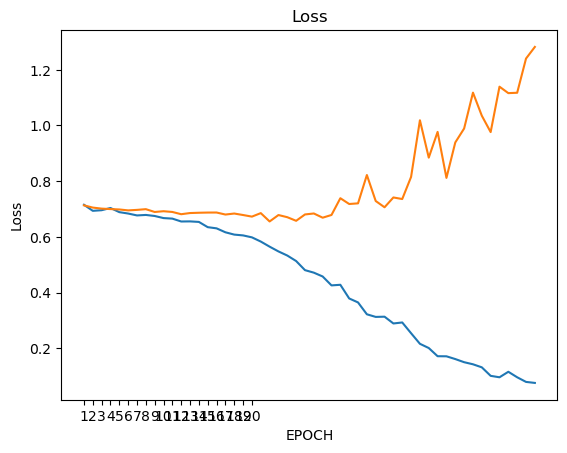

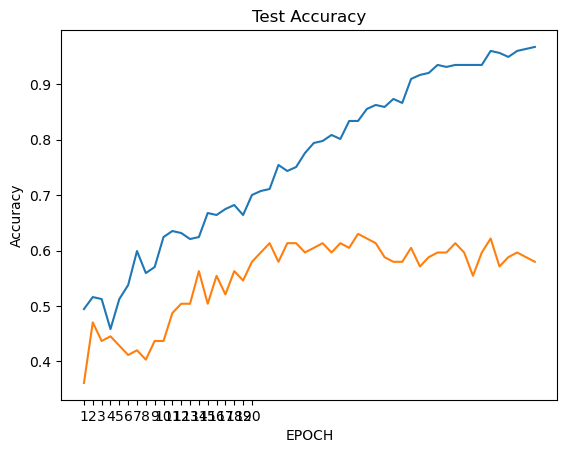

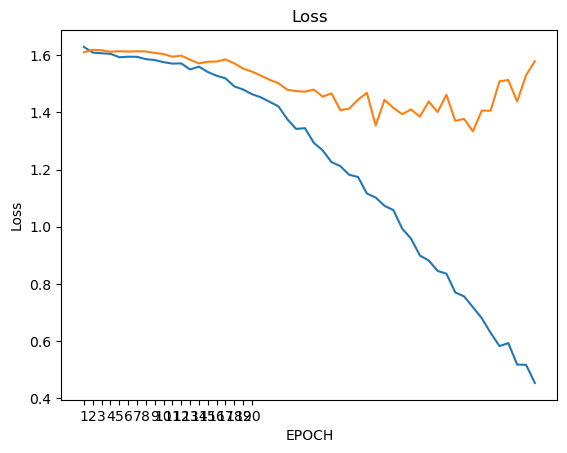

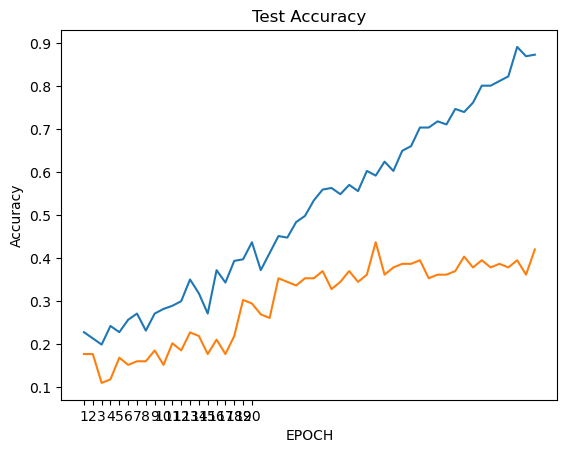

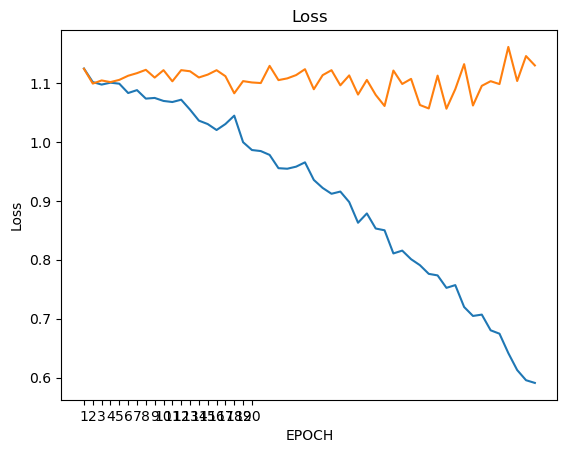

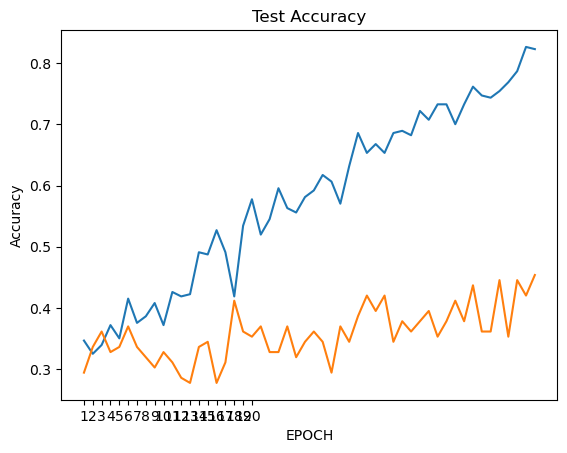

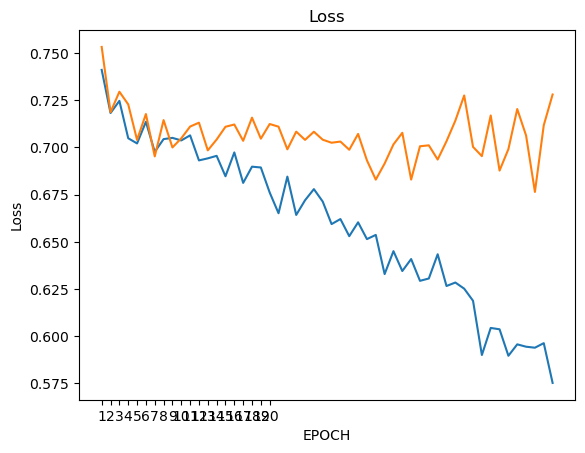

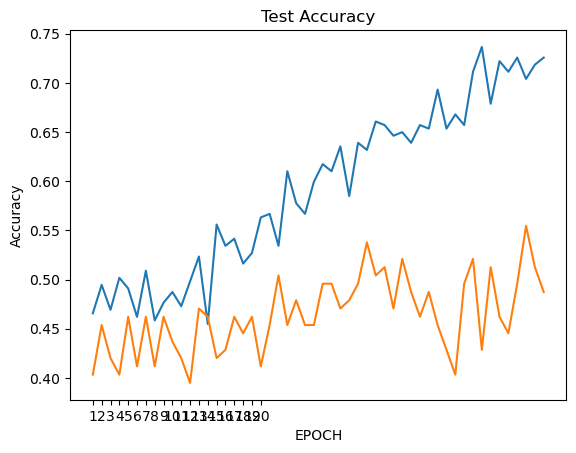

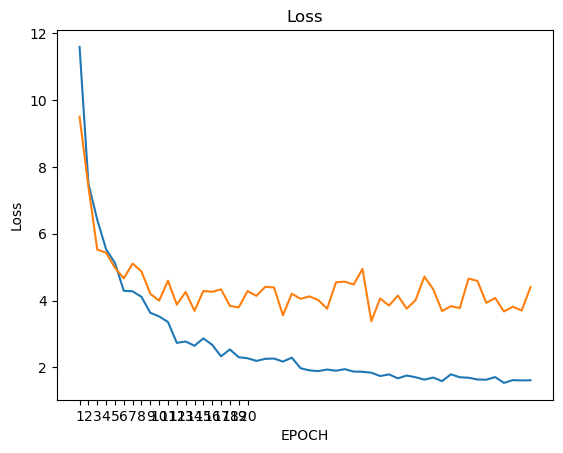

In [23]:
plot_diagram(CoLA_databox.H, 20, has_accuracy=True)
plot_diagram(Sentiment_databox.H, 20, has_accuracy=True)
plot_diagram(MNLI_databox.H, 20, has_accuracy=True)
plot_diagram(RTE_databox.H, 20, has_accuracy=True)
plot_diagram(SQuAD_databox.H, 20, has_accuracy=False)